In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file_path = r"D:\PhD\2nd Year Paper\healtdata.csv"  # Replace with your file path
hdata = pd.read_csv(file_path)

# **Adjsut CPI for monetary variable**

In [39]:
cpi_data = pd.DataFrame({
    'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], 
    'cpi': [0.7403, 0.8019, 0.8243, 0.8178, 0.8062, 0.8096, 0.8151, 0.8086, 0.8183, 0.8502, 0.8655, 0.8786, 0.8207, 0.9750, 0.9681, 1, 1.0539, 1.0813, 1.1095, 1.1317, 1.1475, 1.1705, 1.1891, 1.2141, 1.2494, 1.2805, 1.2921, 1.3180]
})

In [40]:
data = hdata.merge(cpi_data, on='year')

In [41]:
monetary_vars = ['total_medical_sales', 'chinese_med', 'chiese_trad', 'hexpf', 'hexpg', 'gdp']

# Use a for loop to adjust all monetary variables
for var in monetary_vars:
    data[f'{var}_adjusted'] = data[var] / data['cpi']

In [42]:
# Convert the 'year' column to a datetime type
data['year'] = pd.to_datetime(data['year'], format='%Y')+ pd.offsets.YearEnd(0)

# Extract the year from the datetime column
data['year'] = data['year'].dt.year

interpolated_data_list = []

num_var = ['total_medical_sales', 'chinese_med', 'chiese_trad', 'CR', 'total_medical_sales_adjusted', 'chinese_med_adjusted', 'chiese_trad_adjusted','hexpf', 'hexpg', 'gdp','hexpf_adjusted', 'hexpg_adjusted', 'gdp_adjusted', 'hos_num', 'annual_patient']

In [43]:
for name, group in data.groupby('name'):
    group = group.sort_values(by='year')  # Ensure sorted by year
    
    for col in num_var:
        if col in group.columns:           
            # Apply interpolation method based on the last year
            if group['year'].iloc[-1] == 2022:
                group[col] = group[col].interpolate(method='linear')
            else:
                group[col] = group[col].interpolate(method='polynomial', order=3)
    
    interpolated_data_list.append(group)

data_interpolated = pd.concat(interpolated_data_list).reset_index(drop=True)

In [44]:
file_path = r'D:\PhD\2nd Year Paper\Data\data_interpolated.csv'

# Save the DataFrame as a CSV file
data_interpolated.to_csv(file_path, index=False)

print(f"Data has been saved to {file_path}")

Data has been saved to D:\PhD\2nd Year Paper\Data\data_interpolated.csv


# **Using Saved Data**

In [16]:
file_path = r'D:\PhD\2nd Year Paper\Data\data_interpolated.csv'  # Replace with your file path
data_interpolated = pd.read_csv(file_path)

,name,class,year,chinese,total_medical_sales,chinese_med,chiese_trad,population,permit_num,law_distributor,...,hexpg,ncp,ncp2,cpi,total_medical_sales_adjusted,chinese_med_adjusted,chiese_trad_adjusted,hexpf_adjusted,hexpg_adjusted,gdp_adjusted
0,anhui,province,1995,安徽,NaN,NaN,NaN,6013.00,NaN,NaN,...,NaN,0,0,0.7403,NaN,NaN,NaN,66.473051,NaN,2445.846279
1,anhui,province,1996,安徽,NaN,NaN,NaN,6070.00,NaN,NaN,...,NaN,0,0,0.8019,NaN,NaN,NaN,93.814690,NaN,2610.425240
2,anhui,province,1997,安徽,NaN,NaN,NaN,6127.00,NaN,NaN,...,10.10,0,0,0.8243,NaN,NaN,NaN,112.810870,12.252821,2847.652554
3,anhui,province,1998,安徽,NaN,NaN,NaN,6184.00,NaN,NaN,...,10.42,0,0,0.8178,NaN,NaN,NaN,146.930790,12.741502,3109.513328
4,anhui,province,1999,安徽,NaN,NaN,NaN,6237.00,NaN,NaN,...,11.41,0,0,0.8062,NaN,NaN,NaN,156.698090,14.152816,3364.351278
5,anhui,province,2000,安徽,NaN,NaN,NaN,6286.00,NaN,NaN,...,11.71,0,0,0.8096,NaN,NaN,NaN,223.851285,14.463933,3860.338439
6,anhui,province,2001,安徽,NaN,NaN,NaN,6328.00,NaN,NaN,...,12.78,0,0,0.8151,NaN,NaN,NaN,251.662373,15.679058,4297.362287
7,anhui,province,2002,安徽,NaN,NaN,NaN,6338.00,NaN,NaN,...,14.30,0,0,0.8086,NaN,NaN,NaN,368.488746,17.684887,4733.687856
8,anhui,province,2003,安徽,NaN,NaN,NaN,6410.00,NaN,NaN,...,17.08,0,0,0.8183,NaN,NaN,NaN,388.854943,20.872541,5264.291825
9,anhui,province,2004,安徽,NaN,NaN,NaN,6461.00,NaN,NaN,...,22.12,0,0,0.8502,NaN,NaN,NaN,465.466949,26.017408,6032.839332


In [17]:
# Creating a new variable that equals 1 for a specific subset of 'name'
# For example, setting the new variable 'region' to 1 for 'huabei'
data_interpolated['region'] = ''  # Initialize the new column with zeros
huabei = ['beijing', 'tianjin', 'hebei','shanxi']
dongbei = ["neimeng", "liaoning", "jilin", "heilongjiang"]
huadong =["shanghai", "jiangsu", "zhejiang", "anhui", "fujian", "jiangxi", "shandong"]
zhongnan = ["henan", "hubei", "hunan", "guangdong", "guangxi", "hainan"]
xinan = ["chongqing", "sichuan", "guizhou", "yunnan", "xizang"]
xibei = ["shan_xi", "gansu","qinghai", "ningxia", "xinjiang"]
region = {'huabei': huabei, 'dongbei':dongbei, 'huadong':huadong,'zhongnan': zhongnan,'xinan': xinan, 'xibei':xibei}

In [19]:
data_interpolated.set_index(['name', 'year'], inplace=True)
for k in region:
    data_interpolated.loc[data_interpolated.index.get_level_values('name').isin(region[k]), 'region'] = f'{k}'

In [22]:
data_interpolated['region'] = data_interpolated['region'].astype('category')
data_reset = data_interpolated.reset_index()
file_path = r'D:\PhD\2nd Year Paper\Data\data.csv'
# Save the DataFrame as a CSV file
data_reset.to_csv(file_path, index=False)

In [21]:
region_data = {}

for k in region:
    region_data[k] = data_reset[data_reset['name'].isin(region[k])].copy()
    
data_reset['year'] = pd.to_numeric(data_reset['year'], downcast='integer', errors='coerce')

# **region**

In [ ]:
filtered_data = data_reset[data_reset['class'].str.contains('region', case=False, na=False)].copy()
filtered_data.head(29)

-  **<h3>Real GDP Graph</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in filtered_data['name'].unique():
    subset = filtered_data[filtered_data['name'] == name]
    plt.plot(subset['year'], subset['gdp_adjusted'], marker='o', linestyle='-', label=f'Real GDP of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Real GDP')
plt.title('Real GDP Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/real GDP region.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Health Per Family</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in filtered_data['name'].unique():
    subset = filtered_data[filtered_data['name'] == name]
    plt.plot(subset['year'], subset['hexpf_adjusted'], marker='o', linestyle='-', label=f'Health Exp of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Exp')
plt.title('Health Exp Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/health exp region.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Real Total Medical Sales</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in filtered_data['name'].unique():
    subset = filtered_data[filtered_data['name'] == name]
    plt.plot(subset['year'], subset['total_medical_sales_adjusted'], marker='o', linestyle='-', label=f'Medical Sales of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Medical Sales')
plt.title('Medical Sales Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Medical Sales region.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Government Budget</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in filtered_data['name'].unique():
    subset = filtered_data[filtered_data['name'] == name]
    plt.plot(subset['year'], subset['hexpg_adjusted'], marker='o', linestyle='-', label=f'Health Budget of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Budget')
plt.title('Health Budget Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Health Budget region.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Cocentratio Ratio</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in filtered_data['name'].unique():
    subset = filtered_data[filtered_data['name'] == name]
    plt.plot(subset['year'], subset['CR'], marker='o', linestyle='-', label=f'CR of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('CR')
plt.title('Concentration Ratio Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Concentration Ratio region.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Hospitals</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in filtered_data['name'].unique():
    subset = filtered_data[filtered_data['name'] == name]
    plt.plot(subset['year'], subset['hos_num'], marker='o', linestyle='-', label=f'# of Hospitals of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of Hospitals')
plt.title('# of Hospitals Time Series')
plt.xticks(filtered_data['year'].unique(), rotation=45)  # Make sure only unique years are shown
plt.xlim(2002, 2022)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/hospitals region.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Patients</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in filtered_data['name'].unique():
    subset = filtered_data[filtered_data['name'] == name]
    plt.plot(subset['year'], subset['annual_patient'], marker='o', linestyle='-', label=f'# of Patients of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of Patients')
plt.title('# of Patients Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/patients region.png', dpi=300, bbox_inches='tight')
plt.show()

# **huabei**

-  **<h3>Real GDP Graph</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huabei']['name'].unique():
    subset = region_data['huabei'][region_data['huabei']['name'] == name]
    plt.plot(subset['year'], subset['gdp_adjusted'], marker='o', linestyle='-', label=f'Real GDP of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Real GDP')
plt.title('Huabei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/real GDP huabei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Health Per Family</h3>**

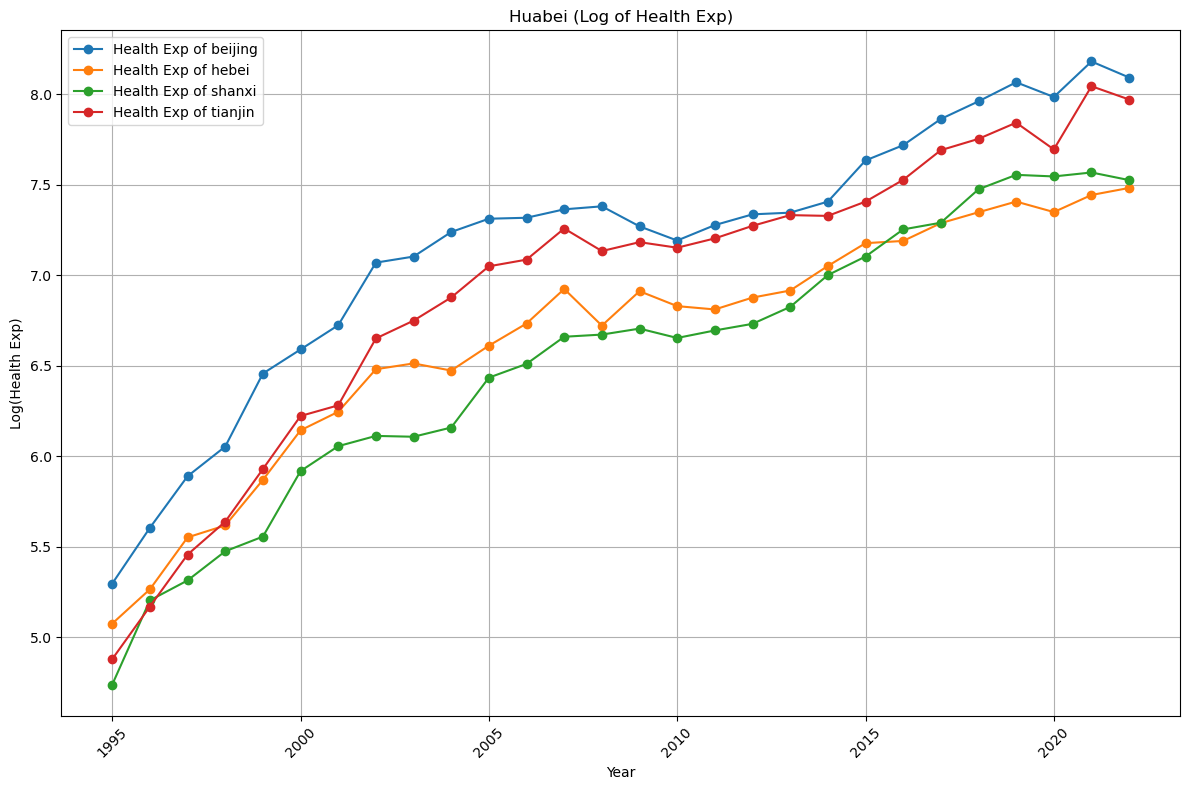

In [14]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot the natural log of hexpf_adjusted
for name in region_data['huabei']['name'].unique():
    subset = region_data['huabei'][region_data['huabei']['name'] == name]
    plt.plot(subset['year'], np.log(subset['hexpf_adjusted']), marker='o', linestyle='-', label=f'Health Exp of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Log(Health Exp)')
plt.title('Huabei (Log of Health Exp)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/log_hexpf_huabei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Real Total Medical Sales</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huabei']['name'].unique():
    subset = region_data['huabei'][region_data['huabei']['name'] == name]
    plt.plot(subset['year'], subset['total_medical_sales_adjusted'], marker='o', linestyle='-', label=f'Medical Sales of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Medical Sales')
plt.title('Huabei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/real medical sales huabei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Government Budget</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huabei']['name'].unique():
    subset = region_data['huabei'][region_data['huabei']['name'] == name]
    plt.plot(subset['year'], subset['hexpg_adjusted'], marker='o', linestyle='-', label=f'Health Budget of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Budget')
plt.title('Huabei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/real government budget huabei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Cocentratio Ratio</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huabei']['name'].unique():
    subset = region_data['huabei'][region_data['huabei']['name'] == name]
    plt.plot(subset['year'], subset['CR'], marker='o', linestyle='-', label=f'CR of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('CR')
plt.title('Huabei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Cocentration Ratio huabei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Hospital Number</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huabei']['name'].unique():
    subset = region_data['huabei'][region_data['huabei']['name'] == name]
    plt.plot(subset['year'], subset['hos_num'], marker='o', linestyle='-', label=f'# of hospital of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of hospital')
plt.title('Num of Hospital for Provinces in Huabei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Num of Hospital huabei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Annual Patient</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huabei']['name'].unique():
    subset = region_data['huabei'][region_data['huabei']['name'] == name]
    plt.plot(subset['year'], subset['annual_patient'], marker='o', linestyle='-', label=f'# of patients of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of patients')
plt.title('Num of patients for Provinces in Huabei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Num of patients huabei.png', dpi=300, bbox_inches='tight')
plt.show()

# **dongbei**

-  **<h3>Real GDP Graph</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['dongbei']['name'].unique():
    subset = region_data['dongbei'][region_data['dongbei']['name'] == name]
    plt.plot(subset['year'], subset['gdp_adjusted'], marker='o', linestyle='-', label=f'Real GDP of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Real GDP')
plt.title('Dongbei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/real GDP dongbei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Real Total Medical Sales</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['dongbei']['name'].unique():
    subset = region_data['dongbei'][region_data['dongbei']['name'] == name]
    plt.plot(subset['year'], subset['total_medical_sales_adjusted'], marker='o', linestyle='-', label=f'Medical Sales of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Medical Sales')
plt.title('Dongbei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real Medical Sales dongbei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Health Expenditure per Family Member</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['dongbei']['name'].unique():
    subset = region_data['dongbei'][region_data['dongbei']['name'] == name]
    plt.plot(subset['year'], subset['hexpf_adjusted'], marker='o', linestyle='-', label=f'Health Exp of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Exp')
plt.title('Dongbei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real Health Exp per Family Member dongbei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Government Budget</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['dongbei']['name'].unique():
    subset = region_data['dongbei'][region_data['dongbei']['name'] == name]
    plt.plot(subset['year'], subset['hexpg_adjusted'], marker='o', linestyle='-', label=f'Health Budget of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Budget')
plt.title('Dongbei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real Government Health Budget dongbei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Cocentratio Ratio</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['dongbei']['name'].unique():
    subset = region_data['dongbei'][region_data['dongbei']['name'] == name]
    plt.plot(subset['year'], subset['CR'], marker='o', linestyle='-', label=f'CR of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('CR')
plt.title('Dongbei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Cocentration Ratio dongbei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Hospital Number</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['dongbei']['name'].unique():
    subset = region_data['dongbei'][region_data['dongbei']['name'] == name]
    plt.plot(subset['year'], subset['hos_num'], marker='o', linestyle='-', label=f'# of Hospital of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of Hospital')
plt.title('Num of Hospital for Provinces in Dongbei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/num of Hospital dongbei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Annual Patient</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['dongbei']['name'].unique():
    subset = region_data['dongbei'][region_data['dongbei']['name'] == name]
    plt.plot(subset['year'], subset['annual_patient'], marker='o', linestyle='-', label=f'# of patients of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of patients')
plt.title('Num of patients for Provinces in Dongbei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/num of patients dongbei.png', dpi=300, bbox_inches='tight')
plt.show()

# **huadong**

-  **<h3>Real GDP Graph</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huadong']['name'].unique():
    subset = region_data['huadong'][region_data['huadong']['name'] == name]
    plt.plot(subset['year'], subset['gdp_adjusted'], marker='o', linestyle='-', label=f'Real GDP of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Real GDP')
plt.title('Huadong')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real GDP huadong.png', dpi=300, bbox_inches='tight')
plt.show

-  **<h3>Health Expenditure per Family Member</h3>**

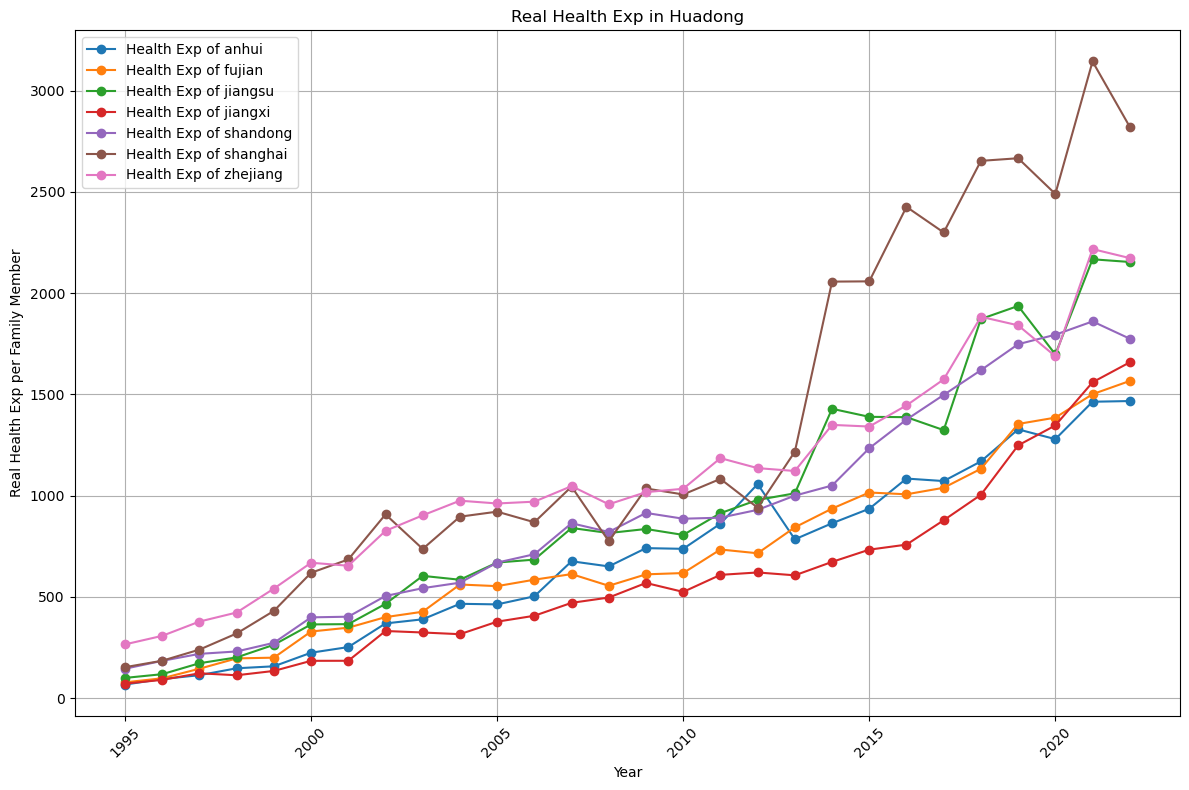

In [15]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huadong']['name'].unique():
    subset = region_data['huadong'][region_data['huadong']['name'] == name]
    plt.plot(subset['year'], subset['hexpf_adjusted'], marker='o', linestyle='-', label=f'Health Exp of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Real Health Exp per Family Member')
plt.title('Real Health Exp in Huadong')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real Health Exp huadong.png', dpi=300, bbox_inches='tight')
plt.show()

 **<h3>Real Total Medical Sales</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huadong']['name'].unique():
    subset = region_data['huadong'][region_data['huadong']['name'] == name]
    plt.plot(subset['year'], subset['total_medical_sales_adjusted'], marker='o', linestyle='-', label=f'Medical Sales of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Medical Sales')
plt.title('Huadong')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real Med Sales huadong.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Government Budget</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huadong']['name'].unique():
    subset = region_data['huadong'][region_data['huadong']['name'] == name]
    plt.plot(subset['year'], subset['hexpg_adjusted'], marker='o', linestyle='-', label=f'Health Budget of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Budget')
plt.title('Huadong')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real Budget huadong.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Cocentratio Ratio</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huadong']['name'].unique():
    subset = region_data['huadong'][region_data['huadong']['name'] == name]
    plt.plot(subset['year'], subset['CR'], marker='o', linestyle='-', label=f'CR of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('CR')
plt.title('Huadong')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Concentration Ratio huadong.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Hospital Number</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huadong']['name'].unique():
    subset = region_data['huadong'][region_data['huadong']['name'] == name]
    plt.plot(subset['year'], subset['hos_num'], marker='o', linestyle='-', label=f'# of Hospital of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of Hospital')
plt.title('# of Hospital in Huadong')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/# of Hospital huadong.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Annual Patient</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['huadong']['name'].unique():
    subset = region_data['huadong'][region_data['huadong']['name'] == name]
    plt.plot(subset['year'], subset['annual_patient'], marker='o', linestyle='-', label=f'# of Patients of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of Patients')
plt.title('# of Patients in Huadong')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/# of Patients huadong.png', dpi=300, bbox_inches='tight')
plt.show()

# **zhongnan**

-  **<h3>Real GDP Graph</h3>**

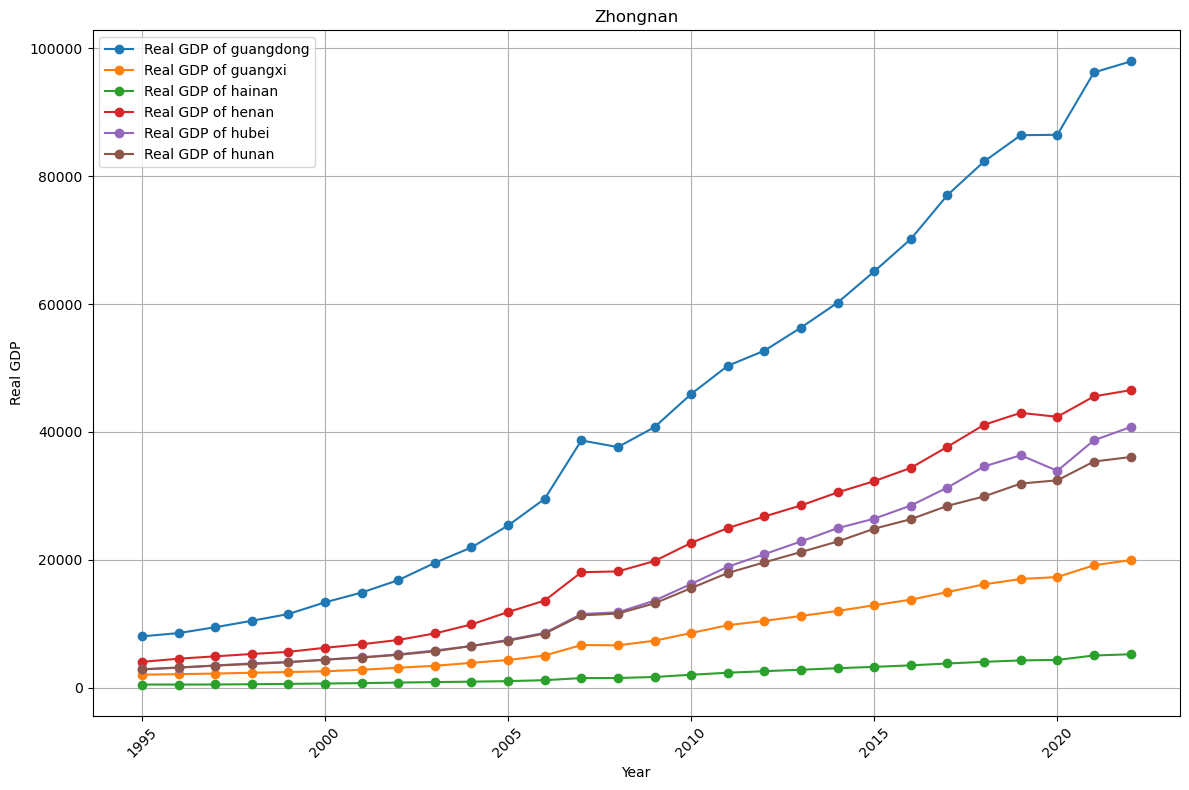

In [51]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['zhongnan']['name'].unique():
    subset = region_data['zhongnan'][region_data['zhongnan']['name'] == name]
    plt.plot(subset['year'], subset['gdp_adjusted'], marker='o', linestyle='-', label=f'Real GDP of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Real GDP')
plt.title('Zhongnan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real GDP zhongnan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Health Expenditure per Family Member</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['zhongnan']['name'].unique():
    subset = region_data['zhongnan'][region_data['zhongnan']['name'] == name]
    plt.plot(subset['year'], subset['hexpg_adjusted'], marker='o', linestyle='-', label=f'Health Exp of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Exp')
plt.title('Zhongnan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/health Exp zhongnan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Real Total Medical Sales</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['zhongnan']['name'].unique():
    subset = region_data['zhongnan'][region_data['zhongnan']['name'] == name]
    plt.plot(subset['year'], subset['total_medical_sales_adjusted'], marker='o', linestyle='-', label=f'Medical Sales of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Medical Sales')
plt.title('Zhongnan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Med Sales zhongnan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>CR</h3>**

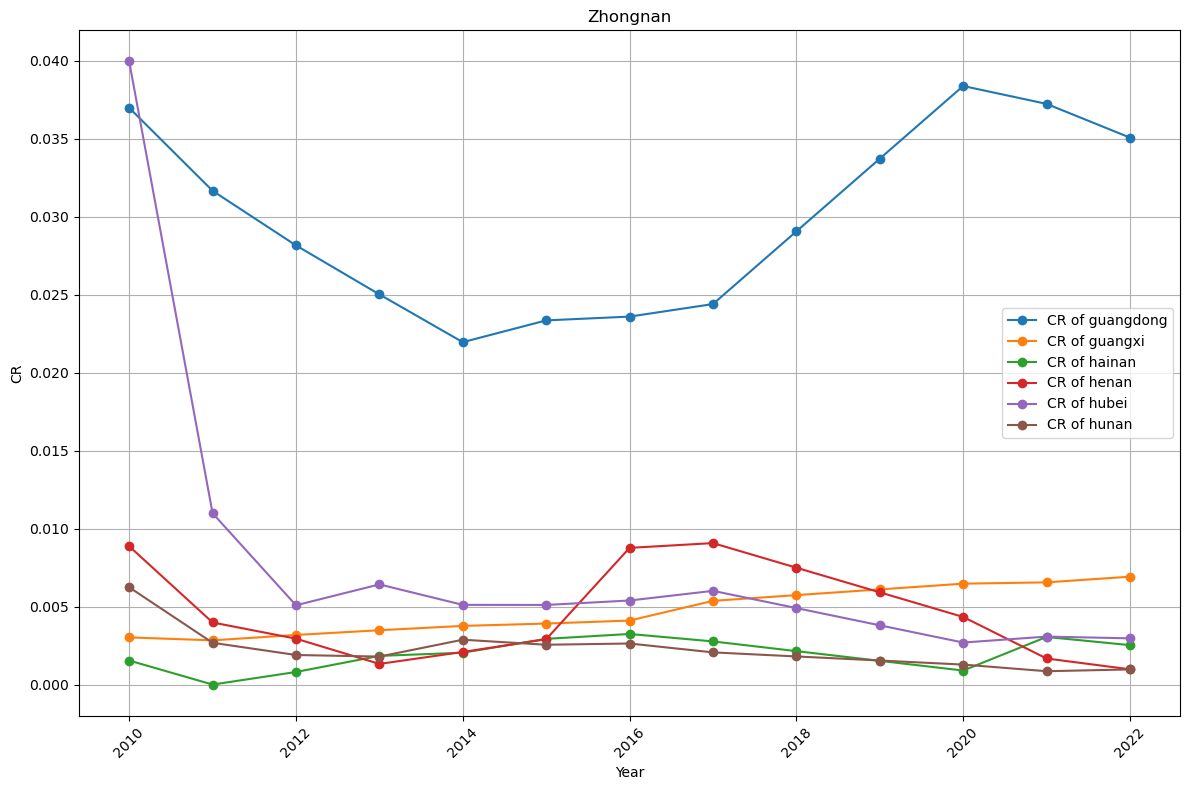

In [52]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['zhongnan']['name'].unique():
    subset = region_data['zhongnan'][region_data['zhongnan']['name'] == name]
    plt.plot(subset['year'], subset['CR'], marker='o', linestyle='-', label=f'CR of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('CR')
plt.title('Zhongnan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Concentration Ratio zhongnan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Government Budget</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['zhongnan']['name'].unique():
    subset = region_data['zhongnan'][region_data['zhongnan']['name'] == name]
    plt.plot(subset['year'], subset['hexpg_adjusted'], marker='o', linestyle='-', label=f'Health Budget of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Budget')
plt.title('Zhongnan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Gov Budget zhongnan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Hospital Number</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['zhongnan']['name'].unique():
    subset = region_data['zhongnan'][region_data['zhongnan']['name'] == name]
    plt.plot(subset['year'], subset['hos_num'], marker='o', linestyle='-', label=f'# of Hospitals of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of Hospitals')
plt.title('Zhongnan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/num of Hos zhongnan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Annual Patient</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['zhongnan']['name'].unique():
    subset = region_data['zhongnan'][region_data['zhongnan']['name'] == name]
    plt.plot(subset['year'], subset['annual_patient'], marker='o', linestyle='-', label=f'# of Patients of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of Patients')
plt.title('# of Patients in zhongnan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/num of Patients zhongnan.png', dpi=300, bbox_inches='tight')
plt.show()

# **xinan**

-  **<h3>Real GDP Graph</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xinan']['name'].unique():
    subset = region_data['xinan'][region_data['xinan']['name'] == name]
    plt.plot(subset['year'], subset['gdp_adjusted'], marker='o', linestyle='-', label=f'Real GDP of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Real GDP')
plt.title('Xinan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real GDP xinan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Health Expenditure per Family Member</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xinan']['name'].unique():
    subset = region_data['xinan'][region_data['xinan']['name'] == name]
    plt.plot(subset['year'], subset['hexpf_adjusted'], marker='o', linestyle='-', label=f'Health Exp of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Exp')
plt.title('Xinan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real health Exp xinan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Real Total Medical Sales</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xinan']['name'].unique():
    subset = region_data['xinan'][region_data['xinan']['name'] == name]
    plt.plot(subset['year'], subset['total_medical_sales_adjusted'], marker='o', linestyle='-', label=f'Medical Sales of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Medical Sales')
plt.title('Xinan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real Med Sales xinan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Government Budget</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xinan']['name'].unique():
    subset = region_data['xinan'][region_data['xinan']['name'] == name]
    plt.plot(subset['year'], subset['hexpg_adjusted'], marker='o', linestyle='-', label=f'Health Budget of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Budget')
plt.title('Xinan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real Gov Budget xinan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Cocentratio Ratio</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xinan']['name'].unique():
    subset = region_data['xinan'][region_data['xinan']['name'] == name]
    plt.plot(subset['year'], subset['CR'], marker='o', linestyle='-', label=f'CR of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('CR')
plt.title('Xinan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/CR xinan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Hospital Number</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xinan']['name'].unique():
    subset = region_data['xinan'][region_data['xinan']['name'] == name]
    plt.plot(subset['year'], subset['hos_num'], marker='o', linestyle='-', label=f'# of Hospitals of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of Hospitals')
plt.title('# of Hospitals in xinan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/hospital xinan.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Annual Patient</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xinan']['name'].unique():
    subset = region_data['xinan'][region_data['xinan']['name'] == name]
    plt.plot(subset['year'], subset['annual_patient'], marker='o', linestyle='-', label=f'# of Patients of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of Patients')
plt.title('# of Patients in xinan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Patients xinan.png', dpi=300, bbox_inches='tight')
plt.show()

# **xibei**

-  **<h3>Real GDP Graph</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xibei']['name'].unique():
    subset = region_data['xibei'][region_data['xibei']['name'] == name]
    plt.plot(subset['year'], subset['gdp_adjusted'], marker='o', linestyle='-', label=f'Real GDP of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Real GDP')
plt.title('Xibei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real GDP xibei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Health Expenditure per Family Member</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xibei']['name'].unique():
    subset = region_data['xibei'][region_data['xibei']['name'] == name]
    plt.plot(subset['year'], subset['hexpf_adjusted'], marker='o', linestyle='-', label=f'Health Exp of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Exp')
plt.title('Xibei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real Health Exp xibei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Real Total Medical Sales</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xibei']['name'].unique():
    subset = region_data['xibei'][region_data['xibei']['name'] == name]
    plt.plot(subset['year'], subset['total_medical_sales_adjusted'], marker='o', linestyle='-', label=f'Medical Sales of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Medical Sales')
plt.title('Xibei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real Med Sales xibei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Government Budget</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xibei']['name'].unique():
    subset = region_data['xibei'][region_data['xibei']['name'] == name]
    plt.plot(subset['year'], subset['hexpg_adjusted'], marker='o', linestyle='-', label=f'Health Budget of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Health Budget')
plt.title('Xibei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/Real Gov Budget xibei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Cocentratio Ratio</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xibei']['name'].unique():
    subset = region_data['xibei'][region_data['xibei']['name'] == name]
    plt.plot(subset['year'], subset['CR'], marker='o', linestyle='-', label=f'CR of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('CR')
plt.title('Xibei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/CR xibei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Hospital Number</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xibei']['name'].unique():
    subset = region_data['xibei'][region_data['xibei']['name'] == name]
    plt.plot(subset['year'], subset['hos_num'], marker='o', linestyle='-', label=f'# of Hospitals of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of Hospitals')
plt.title('# of Hospitals in xibei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/num of Hospitals xibei.png', dpi=300, bbox_inches='tight')
plt.show()

-  **<h3>Annual Patient</h3>**

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each unique name in the filtered data and plot hexpf_adjusted
for name in region_data['xibei']['name'].unique():
    subset = region_data['xibei'][region_data['xibei']['name'] == name]
    plt.plot(subset['year'], subset['annual_patient'], marker='o', linestyle='-', label=f'# of Patients of {name}')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('# of Patients')
plt.title('# of Patients in xibei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('D:/PhD/2nd Year Paper/Graphs/num of Patients xibei.png', dpi=300, bbox_inches='tight')
plt.show()